## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Data:

In [2]:
route = "../Data/Predictive Modeling Assignment - Questions  Data.xlsx"

df_data_0 = pd.read_excel(route, sheet_name = "Property_purchase_data")

df_data_1 = pd.read_excel(route, sheet_name = "Additional_data")

In [3]:
# Merging the two sheets of data together (taking into account that both dataframes have the column "VisitorID" as their ID)
df_data = pd.merge(df_data_0, df_data_1, on = "VisitorID", how = "inner")
df_data = df_data.drop("VisitorID", axis = 1)
print(df_data.shape)
df_data.head()

(120000, 19)


,Proj_Group,Proj_Segment,Proj_Type,Visitor_Group,Visitor_Gender,Question_Age,Question_Budget,Question_HHIncome,Question_InstallmentMonthly,Question_MarriageStatus,Question_Nationality,Question_Occupation,Question_P_Income,Question_TimeToMoveIn,Target_Variable_Convert,Question_Property_Buy_Objective,Question_Channel,Question_Factors_Considered,Question_Reason_to_visit_property_fair
0,Outer,B,Standard Units,Central,F,51 +,11.3,610326,100133,Single,Not Answer,Business Owner,Not Answer,Not Answer,False,Residence,Not_Answer,Near_ShoppingMall,Company
1,Outer,A,Standard Units,Outer,M,46 - 50,13.5,421363,Not Answer,Married with Children,Not Answer,Other(Please specify),225000,Not Answer,False,NaN,Billboard,NaN,Location
2,Central,B,Premium Units,Central,F,51 +,11.3,Not Answer,Not Answer,Not Answer,India,Not Answer,Not Answer,Not Answer,False,Residence,Billboard,Not_Answer,Location
3,Urban,A,Standard Units,Central,M,51 +,Not Answer,Not Answer,Not Answer,Married with Children,Not Answer,Business Owner,Not Answer,Not Answer,False,Residence,Billboard,Not_Answer,Location
4,Outer,A,Standard Units,Central,M,51 +,28.5,588512,122342,Married with Children,Not Answer,Business Owner,Not Answer,Not Answer,False,Residence,Not_Answer,Near_Previous_Home,Project_s_Attractiveness


## Functions:

In [4]:
def outlier_function(df, numeric_var, target, lower = 25, upper = 75):
    """
    Function that shows the characteristics of the outliers of the numeric variables in the specified dataframe, taking into account the relationship the outliers have with the target variable.
    
    Parameters:
    df (pandas.DataFrame): Specifies the dataframe the function is supposed to inspect.
    numeric_var (list): List of the numeric variables in the dataframe the function must analyse.
    lower (int): The lower bound under which values are considered outliers (default value being the IQR lower bound).
    upper (int): The upper bound over which values are considered outliers (default value being the IQR upper bound).

    
    Output:
    df_output (pandas.DataFrame): The output of the function is a dataframe that shows the following columns with the following information:
                                    (i) The percentage of the outliers that belong to the TRUE (1) category.
                                    (ii) The percentage of the outliers that belong to the FALSE (0) category.
                                    (iii) The variable each row of the output dataframe is referencing.
                                    (iv) The quantity of values classified as outliers from each numeric variable.
                                    (v) The percentage of outliers in each numeric variable.

    """
    df_output = pd.DataFrame()
    
    for i in numeric_var:
        Q1 = np.nanpercentile(df[i], lower)
        Q3 = np.nanpercentile(df[i], upper)
        IQR = (Q3 - Q1)

        size = df[i].shape[0]
        
        percent_outlier = df[i][(df[i] < Q1) | (df[i] > Q3)].shape[0] / size
        
        df_concat_percent = pd.DataFrame(df[target][(df[i] < Q1) | (df[i] > Q3)].value_counts(normalize = True)
                                         .reset_index().T)

        if len(df_concat_percent.columns) == 1:
            if (df_concat_percent.iloc[:1][0] == "1.0").sum() == 1:
                df_concat_percent.rename(columns = {0: "1.0"}, inplace = True)
                df_concat_percent["0.0"] = ["0.0", 0]
            else:
                df_concat_percent.rename(columns = {0: "0.0"}, inplace = True)
                df_concat_percent["1.0"] = ["1.0", 0]
            
        df_concat_percent = df_concat_percent.drop(df_concat_percent.index[0])
        df_concat_percent = df_concat_percent.reset_index().drop("index", axis = 1)

        df_concat_percent["Variable"] = i
        df_concat_percent["Quantity_of_Outliers"] = df[i][(df[i] < Q1) | (df[i] > Q3)].shape[0]
        df_concat_percent["Percentage_Outliers"] = percent_outlier
        df_output = pd.concat([df_output, df_concat_percent], axis = 0).reset_index(drop = True)
            
    if df_output.empty:
        print("Outlier table empty")
        
    df_output = df_output.rename(columns = {0: "False_Percent", 1: "True_Percent"})
            
    return df_output

## Question 1 - Analisis of Variables with Missing Data:

In [5]:
# This is the number of missing values imported
df_data["Question_Budget"].isnull().sum()

0

In [6]:
# This is the actual number of missing values that were imported as "Not Answer"
df_data[df_data["Question_Budget"] == "Not Answer"].shape[0]

17251

In [7]:
# Standardising all the missing values to "Not Answer" for simplicity
for i in list(df_data.columns):
    df_data[i] = np.where(df_data[i] == "Not_Answer", "Not Answer", df_data[i])

In [8]:
# Creating a dataframe to visualise how many missing values were imported
variable_list = list(df_data.columns)
null_quantity = []

for i in variable_list:
    a = df_data[i].isnull().sum()
    null_quantity.append(a)
    
df_missing = pd.DataFrame({"Variable": variable_list,
                           "Values_Imported_As_Null": null_quantity})
df_missing

,Variable,Values_Imported_As_Null
0,Proj_Group,0
1,Proj_Segment,0
2,Proj_Type,0
3,Visitor_Group,0
4,Visitor_Gender,0
5,Question_Age,0
6,Question_Budget,0
7,Question_HHIncome,0
8,Question_InstallmentMonthly,0
9,Question_MarriageStatus,0


In [9]:
# Creating a dataframe to visualise how many values were imported missing vs how many values are actually missing
# (seeing as many missing values were imported as "Not Answer" or "Not_Answer")
missing_quantity = []

for i in variable_list:
    a = df_data[df_data[i] == "Not Answer"].shape[0]
    b = df_data[i].isnull().sum()
    c = a + b
    missing_quantity.append(c)
    
df_missing["Values_Actually_Missing"] = missing_quantity
df_missing

,Variable,Values_Imported_As_Null,Values_Actually_Missing
0,Proj_Group,0,0
1,Proj_Segment,0,0
2,Proj_Type,0,0
3,Visitor_Group,0,39670
4,Visitor_Gender,0,1598
5,Question_Age,0,20461
6,Question_Budget,0,17251
7,Question_HHIncome,0,32018
8,Question_InstallmentMonthly,0,73472
9,Question_MarriageStatus,0,23438


In [10]:
# Visualising just how many values are missing for each of the dataframe's variables
for i in variable_list:
    df_data[i] = np.where(df_data[i] == "Not Answer", np.nan, df_data[i])
    
null_percent = []
j = 0

for i in variable_list:
    num = df_missing.iloc[j][2]
    percent = round((num / df_data.shape[0] * 100), 2)
    null_percent.append(percent)
    j += 1
    
for i in variable_list:
    df_missing
    
df_missing = pd.DataFrame({"Variable": variable_list,
                           "Values_Missing": missing_quantity,
                           "Percent_Values_Missing": null_percent})
df_missing

,Variable,Values_Missing,Percent_Values_Missing
0,Proj_Group,0,0.00
1,Proj_Segment,0,0.00
2,Proj_Type,0,0.00
3,Visitor_Group,39670,33.06
4,Visitor_Gender,1598,1.33
5,Question_Age,20461,17.05
6,Question_Budget,17251,14.38
7,Question_HHIncome,32018,26.68
8,Question_InstallmentMonthly,73472,61.23
9,Question_MarriageStatus,23438,19.53


It's interesting to see how different variables have different quantities of missing values. The variable "Question_TimeToMoveIn", for example, has 99% of its data points missing, which means that the variable will more than likely not be significant when training the classification model.

In [11]:
# Eliminating the variables with no missing values and showing the lists as asked in the first question
df_missing[df_missing["Values_Missing"] != 0]

print(f"List of variables with missing values : {list(df_missing['Variable'])}")
print("")
print(f"List of how many values are missing from each of the variables with missing values : {list(df_missing['Values_Missing'])}")

List of variables with missing values : ['Proj_Group', 'Proj_Segment', 'Proj_Type', 'Visitor_Group', 'Visitor_Gender', 'Question_Age', 'Question_Budget', 'Question_HHIncome', 'Question_InstallmentMonthly', 'Question_MarriageStatus', 'Question_Nationality', 'Question_Occupation', 'Question_P_Income', 'Question_TimeToMoveIn', 'Target_Variable_Convert', 'Question_Property_Buy_Objective', 'Question_Channel', 'Question_Factors_Considered', 'Question_Reason_to_visit_property_fair']

List of how many values are missing from each of the variables with missing values : [0, 0, 0, 39670, 1598, 20461, 17251, 32018, 73472, 23438, 98098, 24321, 77314, 118799, 0, 72104, 19283, 80936, 23951]


## Question 2 - Data Preparation for Modeling (Classification):
### Step 1:

In [12]:
# Visualising the types of variable each variable was imported as originally (this does not mean the type does not have to
# be changed)
df_data.dtypes

Proj_Group                                object
Proj_Segment                              object
Proj_Type                                 object
Visitor_Group                             object
Visitor_Gender                            object
Question_Age                              object
Question_Budget                           object
Question_HHIncome                         object
Question_InstallmentMonthly               object
Question_MarriageStatus                   object
Question_Nationality                      object
Question_Occupation                       object
Question_P_Income                         object
Question_TimeToMoveIn                     object
Target_Variable_Convert                   object
Question_Property_Buy_Objective           object
Question_Channel                          object
Question_Factors_Considered               object
Question_Reason_to_visit_property_fair    object
dtype: object

### Step 2:

In [13]:
# We can see that even though almost all of the values in this variable are missing, it's technically a numeric variable
df_data[["Question_TimeToMoveIn"]][df_data["Question_TimeToMoveIn"].notnull()]

,Question_TimeToMoveIn
25,8
158,18
237,8
249,4.5
300,4.5
...,...
17004,18
18566,3
18567,3
24193,3


In [14]:
# Establishing the numeric variables in the data
numeric_var = ["Question_Budget", "Question_HHIncome", "Question_P_Income", "Question_TimeToMoveIn"]

for i in df_data.columns:
    if i in numeric_var:
        df_data[i] = df_data[i].astype("float64")
    
df_data["Target_Variable_Convert"] = df_data["Target_Variable_Convert"].astype("object")
        
df_data.dtypes

Proj_Group                                 object
Proj_Segment                               object
Proj_Type                                  object
Visitor_Group                              object
Visitor_Gender                             object
Question_Age                               object
Question_Budget                           float64
Question_HHIncome                         float64
Question_InstallmentMonthly                object
Question_MarriageStatus                    object
Question_Nationality                       object
Question_Occupation                        object
Question_P_Income                         float64
Question_TimeToMoveIn                     float64
Target_Variable_Convert                    object
Question_Property_Buy_Objective            object
Question_Channel                           object
Question_Factors_Considered                object
Question_Reason_to_visit_property_fair     object
dtype: object

In [15]:
# Investigating the apparently numeric variable "Question_InstallmentMonthly"
display(df_data[df_data["Question_InstallmentMonthly"] == "Cash"].head())
print("Number of unique values :", len(list(df_data["Question_InstallmentMonthly"].unique())))
print("Number of times 'Cash' appears :", df_data[df_data["Question_InstallmentMonthly"] == "Cash"].shape[0])

,Proj_Group,Proj_Segment,Proj_Type,Visitor_Group,Visitor_Gender,Question_Age,Question_Budget,Question_HHIncome,Question_InstallmentMonthly,Question_MarriageStatus,Question_Nationality,Question_Occupation,Question_P_Income,Question_TimeToMoveIn,Target_Variable_Convert,Question_Property_Buy_Objective,Question_Channel,Question_Factors_Considered,Question_Reason_to_visit_property_fair
22,Outer,B,Standard Units,Outer,M,51 +,10.3,259854.0,Cash,Married with Children,NaN,Civil Servant,NaN,NaN,False,NaN,TV,Near_Previous_Home,Company
23,Outer,B,Standard Units,Outer,M,51 +,11.3,216227.0,Cash,Married,India,Civil Servant,NaN,NaN,False,Residence,Billboard,Near_work_place,Location
43,Outer,B,Standard Units,Central,M,41 - 45,18.5,429800.0,Cash,Married,NaN,Business Owner,NaN,NaN,False,Residence,Referral,City_Prime_Area,Location
89,Outer,D,Standard Units,Central,F,41 - 45,4.5,268500.0,Cash,Single,India,Business Owner,NaN,NaN,False,Residence,NaN,Near_Previous_Home,Company
90,Outer,B,Standard Units,Central,F,41 - 45,6.5,421359.0,Cash,Single,India,Business Owner,NaN,NaN,False,Residence,NaN,NaN,Company


Number of unique values : 32120
Number of times 'Cash' appears : 4323


Interestingly, we can see that while at first glance, all the values from the "Question_InstallmentMonthly" variable seem to be numeric, it has one value called "Cash" which is categorical and appears 4323 times. There are two options of how we  can treat this variable. The first option is that we treat it as a categorical variable with 32120 different categories (which would significantly increase the dimensionality of the dataset if considering using encoding such as OneHot Encoding). The second option would be to separate the variable into two different variables, with one variable being a numeric variable that would keep all the numeric values and replace the instances with "Cash" with "NaN" (seeing as we don't know how much Cash is being implied), and the other variable being a categorical variable with three categories "Cash" (indicating Cash will be used), "Not_Cash" (indicating Cash will not be used), and "NaN" (indicating the question was not answered).

In [16]:
# Implementing the strategy explained above of separating the variable "Question_InstallmentMonthly" into two different ones
df_data["Question_CashInstallmentOrNot"] = df_data["Question_InstallmentMonthly"]

df_data["Question_InstallmentMonthly"] = np.where(df_data["Question_InstallmentMonthly"] == "Cash", np.nan, 
                                                  df_data["Question_InstallmentMonthly"])
df_data["Question_InstallmentMonthly"] = df_data["Question_InstallmentMonthly"].astype(float)

numeric_var.append("Question_InstallmentMonthly")

df_data["Question_CashInstallmentOrNot"] = np.where(((df_data["Question_CashInstallmentOrNot"] != "Cash") &
                                                     (df_data["Question_CashInstallmentOrNot"].notnull())), "Not_Cash", 
                                                    df_data["Question_CashInstallmentOrNot"])

In [17]:
# Visualising the two new variables created
df_data[["Question_InstallmentMonthly", "Question_CashInstallmentOrNot"]].head(10)

,Question_InstallmentMonthly,Question_CashInstallmentOrNot
0,100133.0,Not_Cash
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,122342.0,Not_Cash
5,78257.0,Not_Cash
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,39644.0,Not_Cash


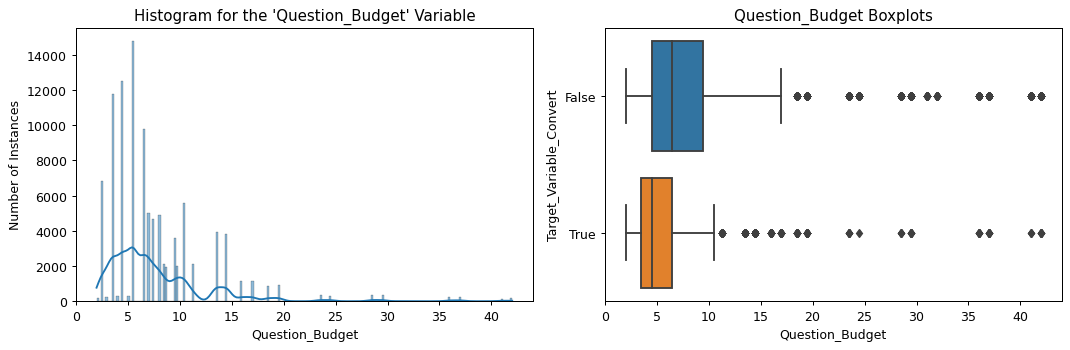

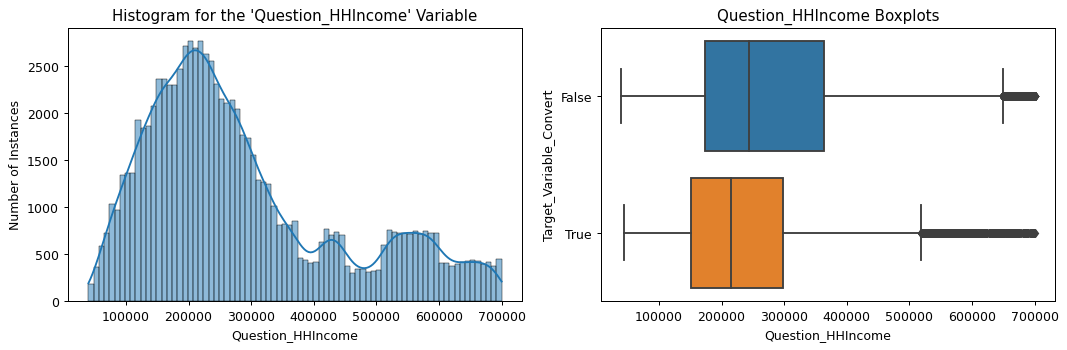

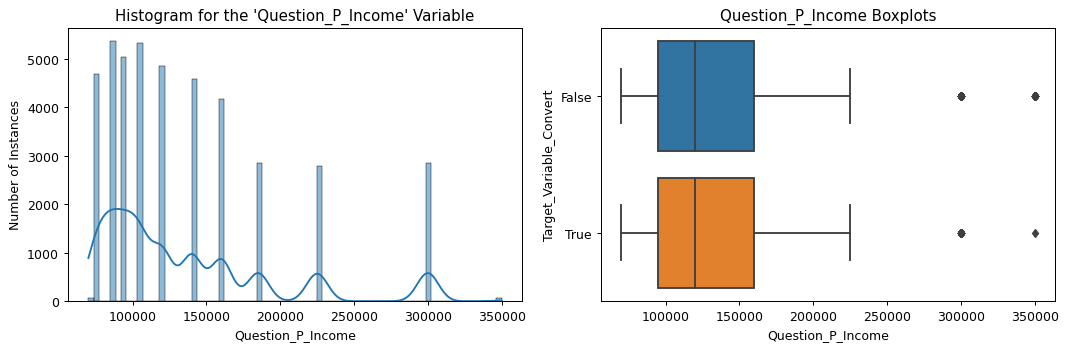

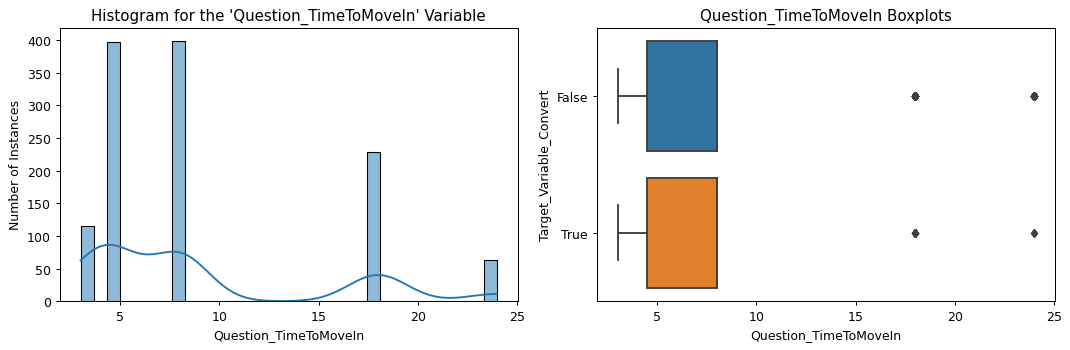

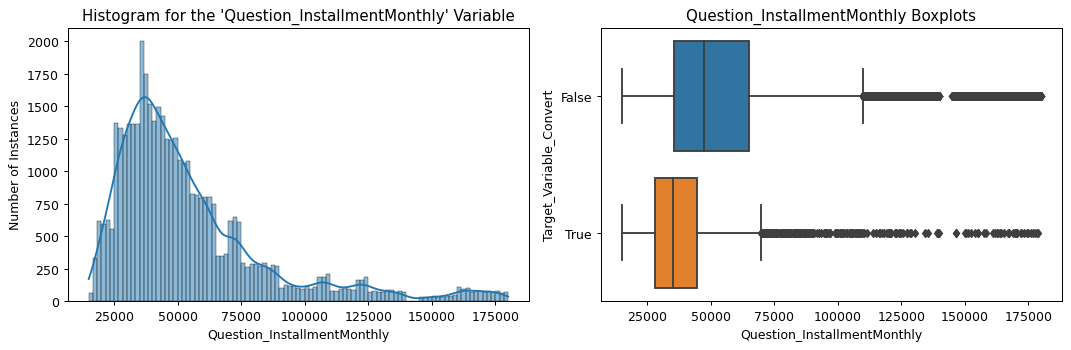

In [18]:
# Generating the distribution histograms for all the numeric variables:
for i in numeric_var:
        f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4), dpi = 90)
        
        ax = sns.histplot(data = df_data, x = i, kde = True, ax = ax1)
        ax1.set_title("Histogram for the '" + i + "' Variable")
        ax1.set_xlabel(i)
        ax1.set_ylabel("Number of Instances")

        sns.boxplot(x = i, y = "Target_Variable_Convert", data = df_data, ax = ax2)
        ax2.set_xlabel(i)
        ax2.set_ylabel("Target_Variable_Convert")
        ax2.set_title(i + " Boxplots")

        plt.tight_layout()

### Step 3:

In [19]:
# Creating a list of the categorical variables
categorical_var = []

for i in df_data.columns:
    if i not in numeric_var:
        categorical_var.append(i)
        
for i in categorical_var:
    df_data[i] = df_data[i].fillna("NaN")

In [20]:
# Analising the number of categories in each categorical variable
unique_cat_var = []

for i in categorical_var:
    n = len(list(df_data[i].unique()))
    unique_cat_var.append(n)

unique_cat = pd.DataFrame({"Variable": categorical_var,
                           "Quantity_of_Categories": unique_cat_var})
unique_cat.set_index("Variable", inplace = True)
unique_cat

,Quantity_of_Categories
Variable,
Proj_Group,5
Proj_Segment,5
Proj_Type,2
Visitor_Group,6
Visitor_Gender,3
Question_Age,8
Question_MarriageStatus,4
Question_Nationality,3
Question_Occupation,5


In [21]:
i = "Proj_Group"
df_data.groupby(i)["Target_Variable_Convert"].value_counts(normalize = True).to_frame("proportion").reset_index()

,Proj_Group,Target_Variable_Convert,proportion
0,Central,False,0.955250
1,Central,True,0.044750
2,Major,False,0.871789
3,Major,True,0.128211
4,Other,False,0.933654
5,Other,True,0.066346
6,Outer,False,0.950728
7,Outer,True,0.049272
8,Urban,False,0.917393
9,Urban,True,0.082607


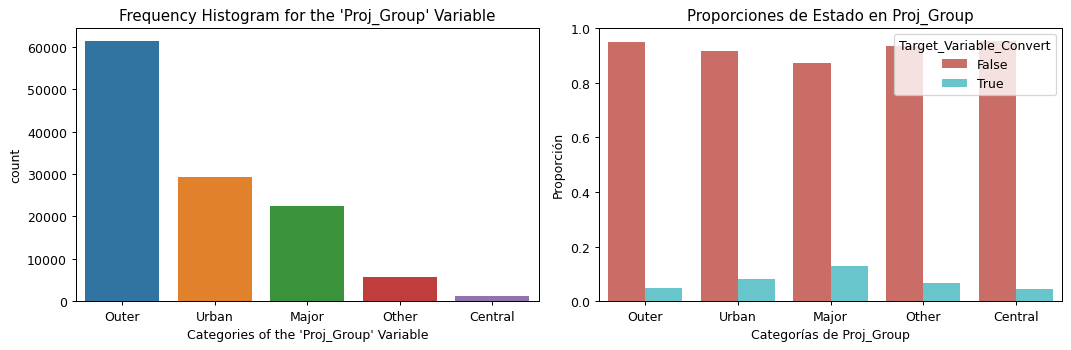

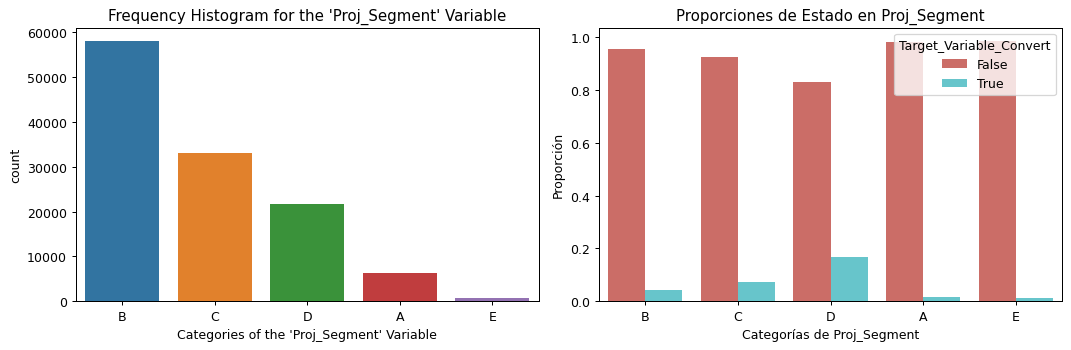

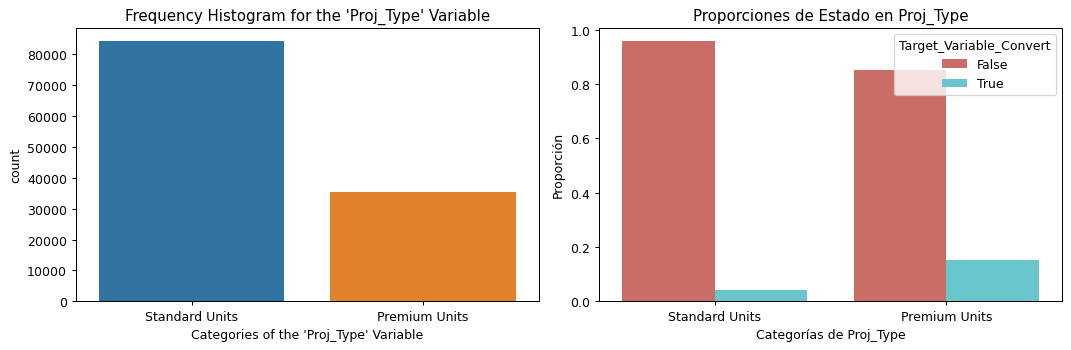

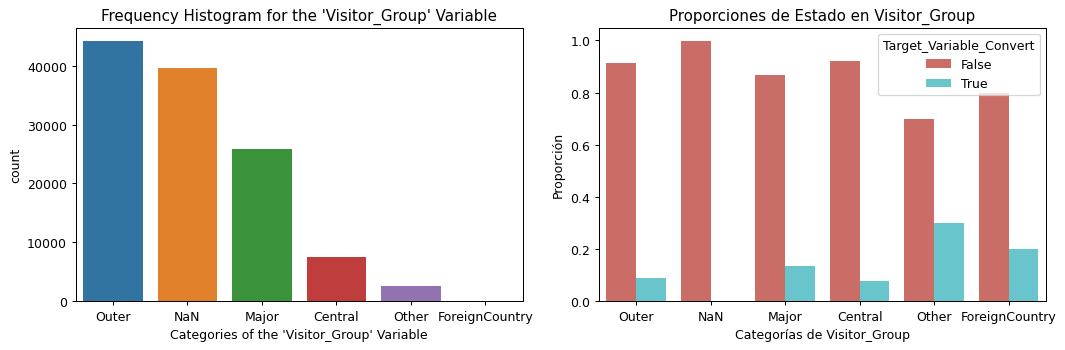

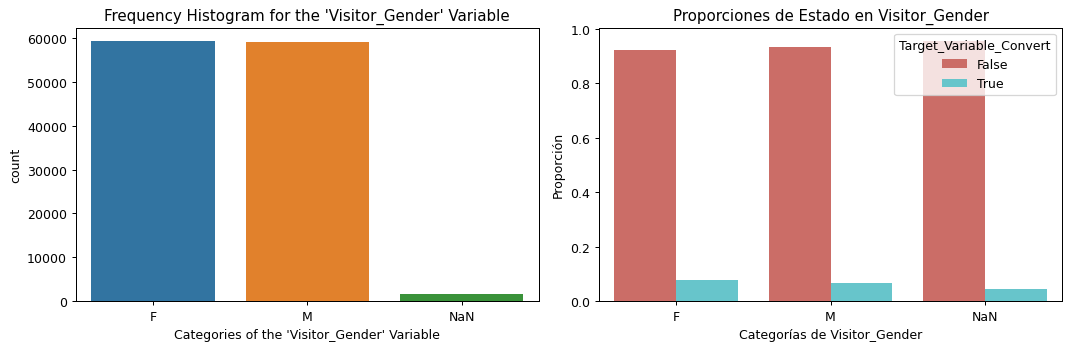

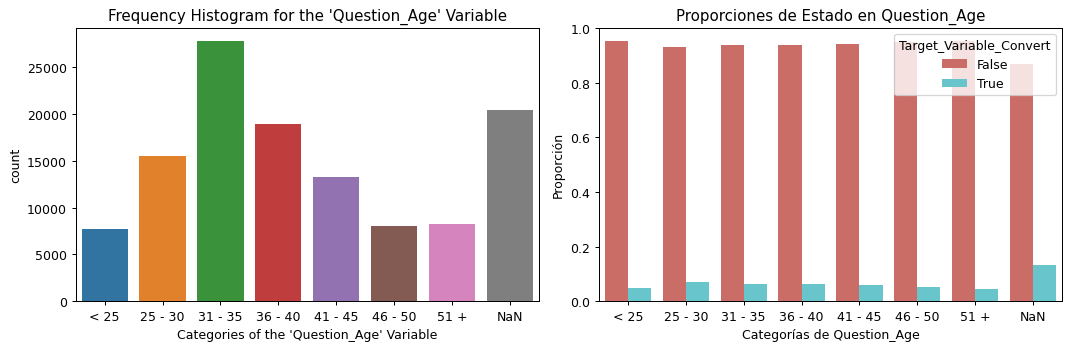

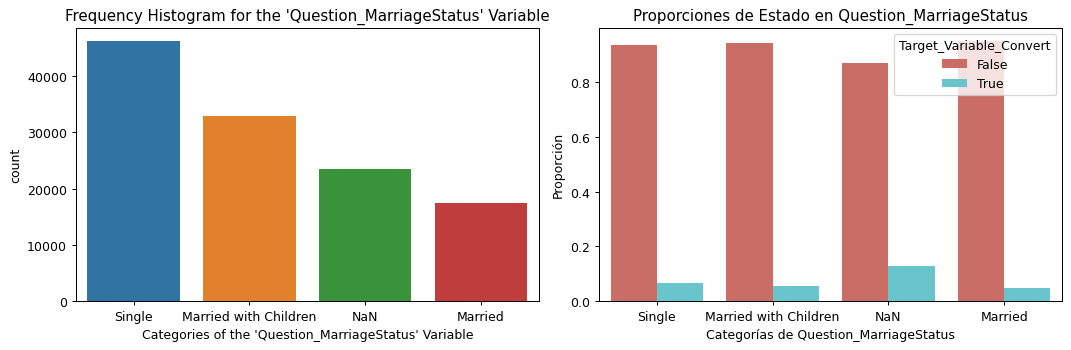

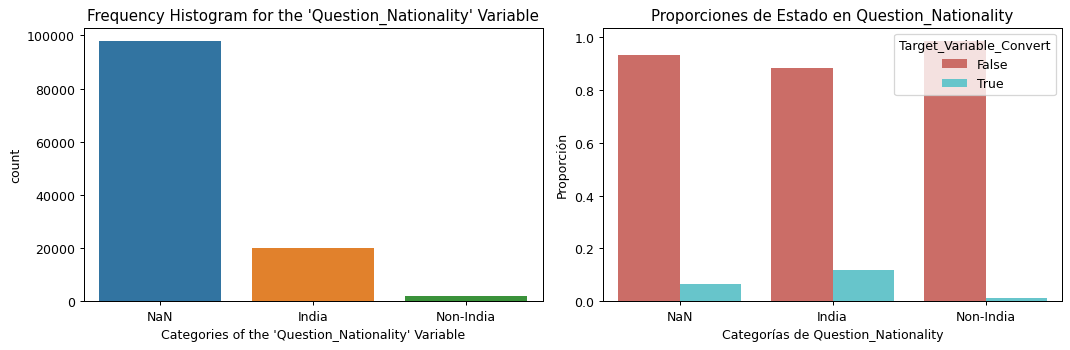

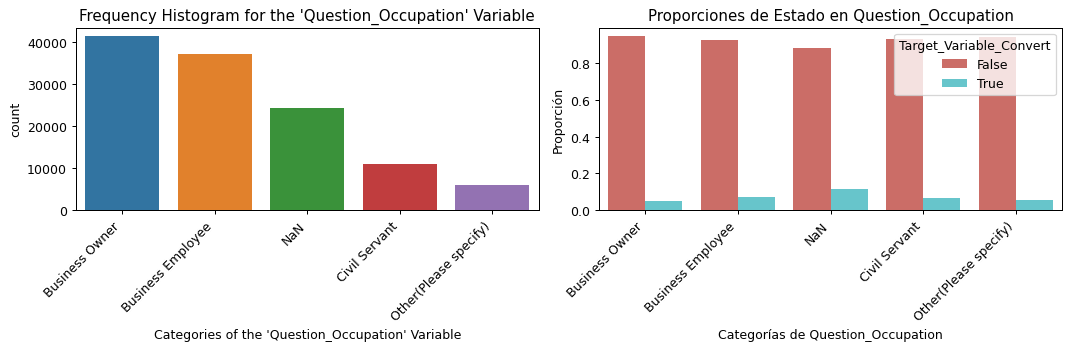

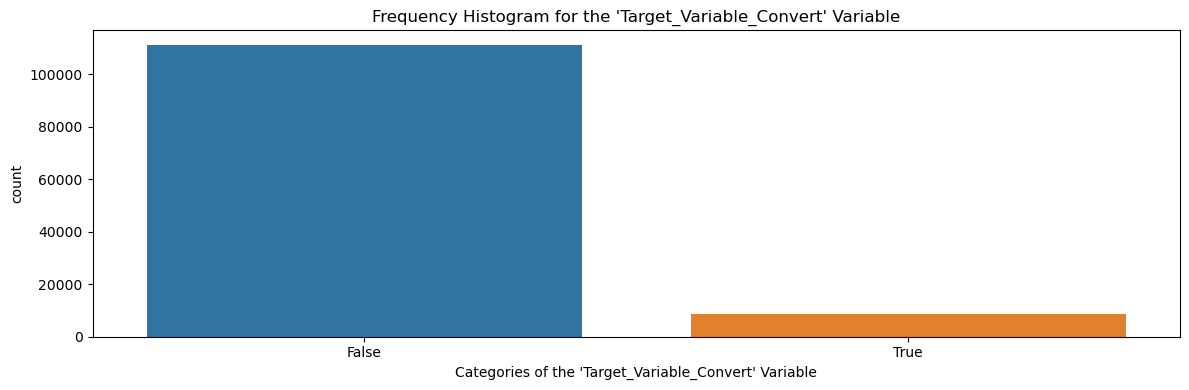

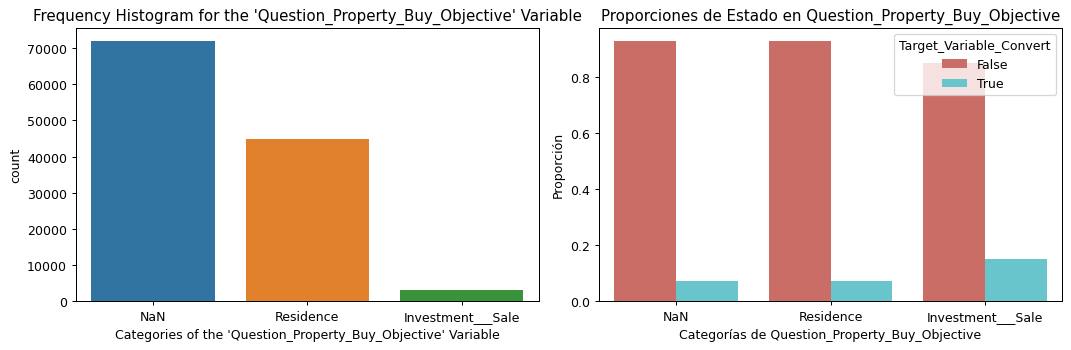

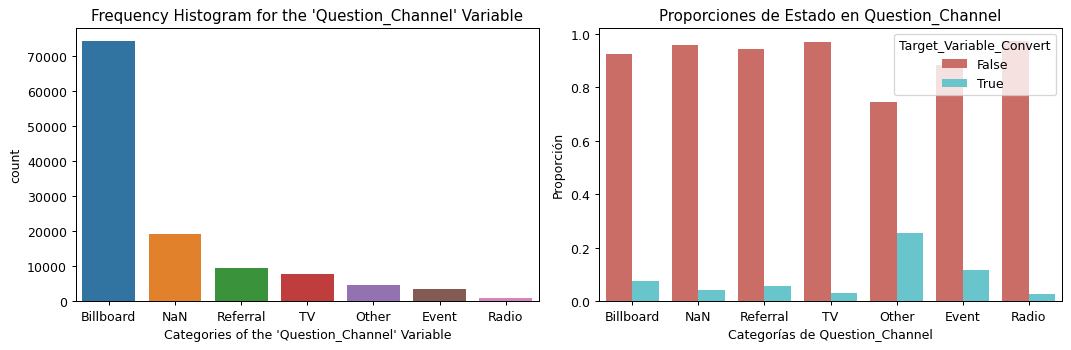

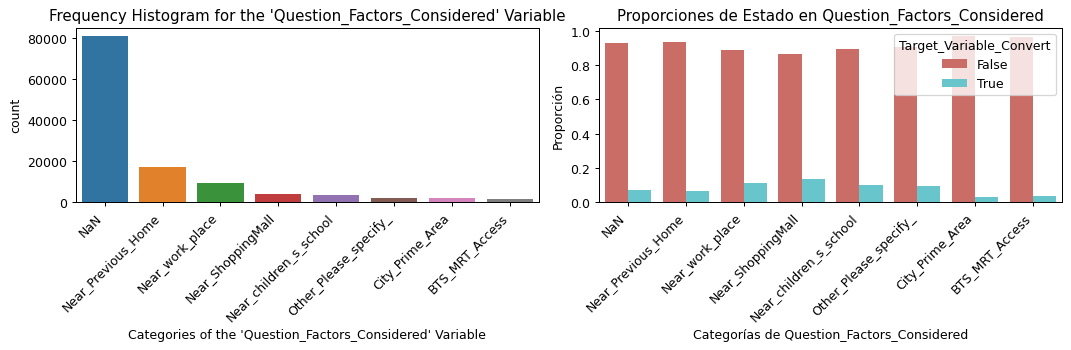

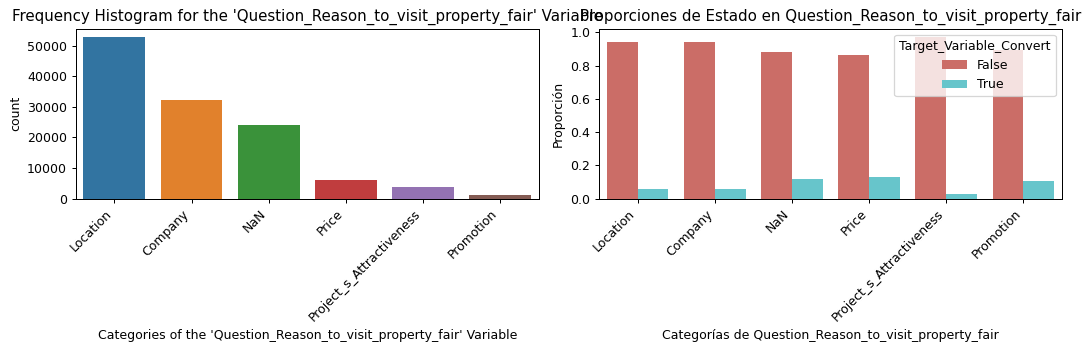

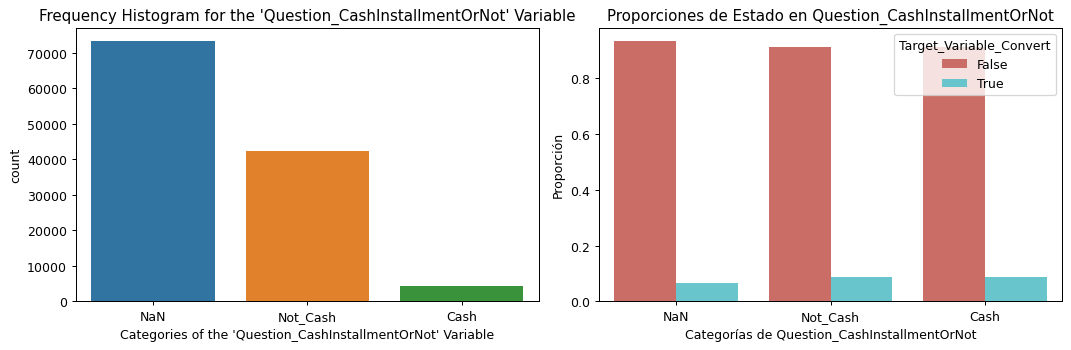

In [22]:
# Generating the frequency distribution histograms for each of the categorical variables
for i in categorical_var:
    
    if i == "Question_Age":
        order = ["< 25", "25 - 30", "31 - 35", "36 - 40", "41 - 45", "46 - 50", "51 +", "NaN"]
    else:
        order = df_data[i].value_counts().index.tolist()
    
    if i == "Target_Variable_Convert":
        f, (ax) = plt.subplots(figsize = (12, 4))
        
        sns.countplot(data = df_data, x = i, ax = ax, order = order)
        ax.set_title("Frequency Histogram for the '" + i + "' Variable")
        ax.set_xlabel("Categories of the '" + i + "' Variable")
        
        plt.tight_layout()
    
    else:
        f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4), dpi = 90)
        
        sns.countplot(data = df_data, x = i, ax = ax1, order = order)
        ax1.set_title("Frequency Histogram for the '" + i + "' Variable")
        ax1.set_xlabel("Categories of the '" + i + "' Variable")

        target_proportion = df_data.groupby(i)["Target_Variable_Convert"].value_counts(normalize = True)\
            .to_frame("proportion").reset_index()

        sns.barplot(x = i, y = "proportion", hue = "Target_Variable_Convert", data = target_proportion, palette = "hls", 
                    ax = ax2, order = order)
        ax2.set_xlabel("Categorías de " + i)
        ax2.set_ylabel("Proporción")
        ax2.set_title("Proporciones de Estado en " + i)
        
        if i in ["Question_Occupation", "Question_Factors_Considered", "Question_Reason_to_visit_property_fair"]:
            ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha = "right")
            ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, ha = "right")

        plt.tight_layout()

## Question 3 - Replacing Numeric Missing Values and Extreme Outliers:

In [23]:
# Applying the function created at the top of the notebook which analises the outliers of numeric variables of the dataset
# (I have considered values outside of a variable's interquartile range as extreme values)
outlier_function(df_data, numeric_var, "Target_Variable_Convert")

,False_Percent,True_Percent,Variable,Quantity_of_Outliers,Percentage_Outliers
0,0.908279,0.091721,Question_Budget,43109,0.359242
1,0.939307,0.060693,Question_HHIncome,43992,0.366600
2,0.954631,0.045369,Question_P_Income,18691,0.155758
3,0.970443,0.029557,Question_TimeToMoveIn,406,0.003383
4,0.901052,0.098948,Question_InstallmentMonthly,21102,0.175850


The table above not only shows us how many outliers are in each of the variable but also shows us what class of the target variable the outliers in question belong to. This is an important factor to take into account because it might be a good idea to not eliminate a certain variable's outliers if they all belong to "Class 1" of the target variable, for example, and would thus provide important information for the training of the classification model, helping the model learn how to differenciate between "Class 1" and "Class 0". In the case of this project, this would not be the case as the percentage of outliers belonging to each class of the target variable is very similar to the total percentage of data points belonging to either class (therefore meaning that the outliers will not provide any special information that other less extreme data points cannot).

In [24]:
outlier_function(df_data, numeric_var, "Target_Variable_Convert", lower = 15, upper = 85)

,False_Percent,True_Percent,Variable,Quantity_of_Outliers,Percentage_Outliers
0,0.913325,0.086675,Question_Budget,21321,0.177675
1,0.936581,0.063419,Question_HHIncome,26396,0.219967
2,0.956318,0.043682,Question_P_Income,10462,0.087183
3,0.977528,0.022472,Question_TimeToMoveIn,178,0.001483
4,0.89906,0.10094,Question_InstallmentMonthly,12661,0.105508


In [25]:
outlier_function(df_data, numeric_var, "Target_Variable_Convert", lower = 10, upper = 90)

,False_Percent,True_Percent,Variable,Quantity_of_Outliers,Percentage_Outliers
0,0.901798,0.098202,Question_Budget,17413,0.145108
1,0.934197,0.065803,Question_HHIncome,17598,0.146650
2,0.959033,0.040967,Question_P_Income,2978,0.024817
3,0.977528,0.022472,Question_TimeToMoveIn,178,0.001483
4,0.896919,0.103081,Question_InstallmentMonthly,8440,0.070333


In [26]:
outlier_function(df_data, numeric_var, "Target_Variable_Convert", lower = 5, upper = 95)

,False_Percent,True_Percent,Variable,Quantity_of_Outliers,Percentage_Outliers
0,0.974465,0.025535,Question_Budget,5326,0.044383
1,0.934432,0.065568,Question_HHIncome,8800,0.073333
2,0.959677,0.040323,Question_P_Income,124,0.001033
3,NaN,NaN,Question_TimeToMoveIn,0,0.000000
4,0.892679,0.107321,Question_InstallmentMonthly,4221,0.035175


In [27]:
# Saving the mean, min, and max values of the variable "Question_Budget" before treating its missing values and outliers as
# an example for later comparison
original_mean = np.nanmean(df_data["Question_Budget"])
original_min = np.nanmin(df_data["Question_Budget"])
original_max = np.nanmax(df_data["Question_Budget"])

In [28]:
original_mean_HHIncome = np.nanmean(df_data["Question_HHIncome"])
original_min_HHIncome = np.nanmin(df_data["Question_HHIncome"])
original_max_HHIncome = np.nanmax(df_data["Question_HHIncome"])

In [29]:
# Imputing the mean of each numeric variable for all its missing values:
for i in df_data[numeric_var]:
    mean = df_data[i].mean()
    df_data[i] = np.where(df_data[i].isnull(), mean, df_data[i])
    
# Capping the extreme outliers of the numeric variables:
for i in df_data[numeric_var]:
    if i in ["Question_Budget", "Question_HHIncome", "Question_InstallmentMonthly"]:
        lower = np.nanpercentile(df_data[i], 5)
        upper = np.nanpercentile(df_data[i], 95)

        df_data[i] = np.where((df_data[i] < lower), lower, df_data[i])
        df_data[i] = np.where((df_data[i] > upper), upper, df_data[i])
    elif i == "Question_P_Income":
        lower = np.nanpercentile(df_data[i], 10)
        upper = np.nanpercentile(df_data[i], 90)

        df_data[i] = np.where((df_data[i] < lower), lower, df_data[i])
        df_data[i] = np.where((df_data[i] > upper), upper, df_data[i])
    else:
        lower = np.nanpercentile(df_data[i], 25)
        upper = np.nanpercentile(df_data[i], 75)

        df_data[i] = np.where((df_data[i] < lower), lower, df_data[i])
        df_data[i] = np.where((df_data[i] > upper), upper, df_data[i])

In [30]:
# Showing the comparison of before the treatment of missing values and capping of extreme values using the "Question_Budget"
# as the example
print("5th Percentile: ", np.nanpercentile(df_data["Question_Budget"], 5))
print("95th Percentile: ", np.nanpercentile(df_data["Question_Budget"], 95))
print("")
print("Original Mean :", original_mean)
print("Original Min :", original_min)
print("Original Max :", original_max)
print("")
print("New Mean: ", np.nanmean(df_data["Question_Budget"]))
print("New Min: ", np.nanmin(df_data["Question_Budget"]))
print("New Max: ", np.nanmax(df_data["Question_Budget"]))

5th Percentile:  2.5
95th Percentile:  16.0

Original Mean : 7.706003951376654
Original Min : 2.0
Original Max : 42.0

New Mean:  7.382683118043323
New Min:  2.5
New Max:  16.0


## Exporting The Preprocessed Dataset for Further Use in The Following Notebook:

In [31]:
df_data.to_csv("../Data/Preprocessed_Data.csv")